In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Importing libraries
import os
import numpy as np
import tensorflow as tf

In [3]:
base_dir ='/content/drive/MyDrive/Model_O/Dataset'

In [4]:
# Function to identify and remove unsupported images
def filter_images(directory):
  """
  Identifies and removes images with unsupported formats from the directory.

  Args:
    directory: The directory containing the images.

  Returns:
    None
  """
  for root, _, files in os.walk(directory):
    for file in files:
      file_path = os.path.join(root, file)
      try:
        # Check if the file is an image and has a supported format
        if imghdr.what(file_path) not in ['jpeg', 'png', 'gif', 'bmp']:
          print(f"Removing unsupported file: {file_path}")
          os.remove(file_path)
      except Exception as e:
        print(f"Error processing file {file_path}: {e}")

In [5]:
# Filter out unsupported image files from the dataset directory
filter_images(base_dir)

Error processing file /content/drive/MyDrive/Model_O/Dataset/normal/105.jpg: name 'imghdr' is not defined
Error processing file /content/drive/MyDrive/Model_O/Dataset/normal/102.jpg: name 'imghdr' is not defined
Error processing file /content/drive/MyDrive/Model_O/Dataset/normal/104.jpg: name 'imghdr' is not defined
Error processing file /content/drive/MyDrive/Model_O/Dataset/normal/1.jpg: name 'imghdr' is not defined
Error processing file /content/drive/MyDrive/Model_O/Dataset/normal/103.jpg: name 'imghdr' is not defined
Error processing file /content/drive/MyDrive/Model_O/Dataset/normal/100.jpg: name 'imghdr' is not defined
Error processing file /content/drive/MyDrive/Model_O/Dataset/normal/10.jpg: name 'imghdr' is not defined
Error processing file /content/drive/MyDrive/Model_O/Dataset/normal/101.jpg: name 'imghdr' is not defined
Error processing file /content/drive/MyDrive/Model_O/Dataset/normal/122.jpg: name 'imghdr' is not defined
Error processing file /content/drive/MyDrive/Mode

In [6]:
# Fetch images count from folders

count = 0
dirs = os.listdir('/content/drive/MyDrive/Model_O/Dataset')
for dir in dirs:
  files = list(os.listdir('/content/drive/MyDrive/Model_O/Dataset/' + dir))
  print(dir + ' folder has ' + str(len(files)) + ' Images')
  count = count + len(files)
  print('Dataset folder has ', count)

normal folder has 338 Images
Dataset folder has  338
potholes folder has 314 Images
Dataset folder has  652


In [7]:
img_size = 180
batch = 32

In [10]:
# Load images into arrays as Dataset

train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed=123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,
                                                                   img_size))

validation_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed=123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,
                                                                   img_size))

Found 652 files belonging to 2 classes.
Using 522 files for training.
Found 652 files belonging to 2 classes.
Using 130 files for validation.


In [11]:
class_name = train_ds.class_names
class_name

['normal', 'potholes']

In [12]:
import matplotlib.pyplot as plt

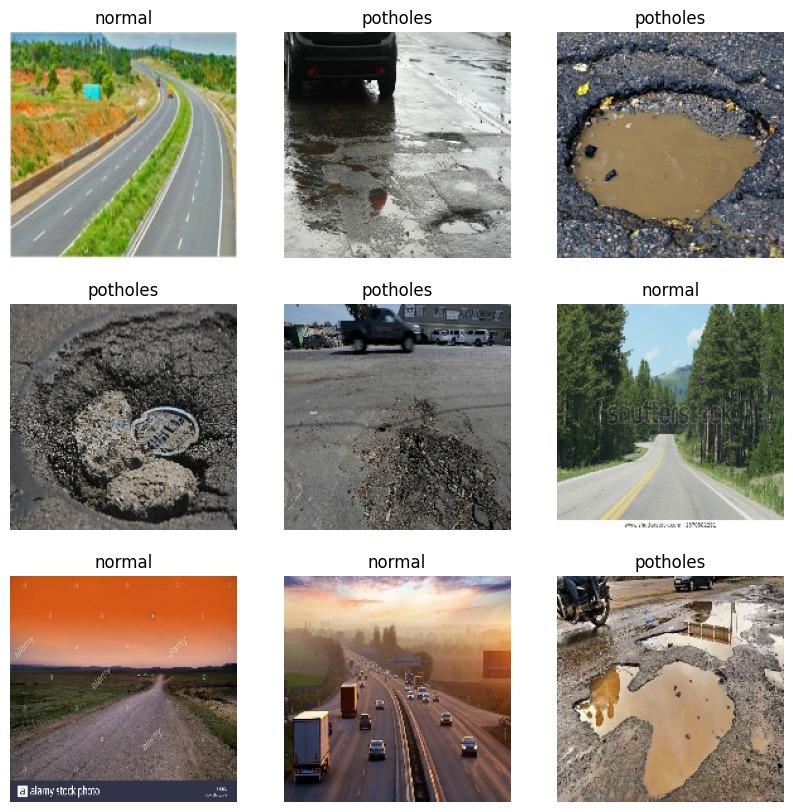

In [13]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_name[labels[i]])
    plt.axis('off')

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size = AUTOTUNE)